<a href="https://colab.research.google.com/github/seetaram-oruganti/Credit-Card-Fraud-detection/blob/main/MLP_without_outliers_Without_databalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import imblearn
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

for i in range (1,29):
  name = 'V'+ "%s" %i
  df3=remove_outlier(df,name)


In [5]:
df3.shape

(254465, 31)

# **Models**

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254465 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    254465 non-null  float64
 1   V1      254465 non-null  float64
 2   V2      254465 non-null  float64
 3   V3      254465 non-null  float64
 4   V4      254465 non-null  float64
 5   V5      254465 non-null  float64
 6   V6      254465 non-null  float64
 7   V7      254465 non-null  float64
 8   V8      254465 non-null  float64
 9   V9      254465 non-null  float64
 10  V10     254465 non-null  float64
 11  V11     254465 non-null  float64
 12  V12     254465 non-null  float64
 13  V13     254465 non-null  float64
 14  V14     254465 non-null  float64
 15  V15     254465 non-null  float64
 16  V16     254465 non-null  float64
 17  V17     254465 non-null  float64
 18  V18     254465 non-null  float64
 19  V19     254465 non-null  float64
 20  V20     254465 non-null  float64
 21  V21     25

In [7]:
X = df3.iloc[:, :-1]
y = df3.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [8]:
X_train.shape

(203572, 30)

In [9]:
y_train.shape

(203572,)

In [10]:
y_test

207137    0
28698     0
211055    0
101313    0
7556      0
         ..
122913    0
282776    0
270266    0
42121     0
135181    0
Name: Class, Length: 50893, dtype: int64

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)   

LogisticRegression()

In [12]:
print(classifier.intercept_, classifier.coef_)

[-2.17204682] [[-9.37213917e-05  2.55661842e-01 -1.17806530e+00 -1.72592379e+00
   2.29550943e-01 -1.81343232e-01 -1.95450297e-01  1.67444332e-02
  -3.72240577e-01 -1.18299151e+00 -2.09545317e-01 -5.30468920e-01
   4.39315894e-01 -1.08409697e+00 -2.19258857e+00 -3.46218740e-01
  -8.77415894e-01 -1.72831617e+00 -3.01615046e-01  2.47861108e-01
   1.41578600e-01  2.67579405e-01  4.84288649e-01  1.12491669e-01
  -3.14540172e-02 -3.05356654e-01  6.47561632e-02 -3.36451995e-02
  -3.13158257e-02 -1.60482240e-02]]


In [13]:
pred = classifier.predict(X_train)

In [14]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9995087733087065


In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
pred_b = classifier.predict(X_test)

In [17]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50849
           1       0.62      0.66      0.64        44

    accuracy                           1.00     50893
   macro avg       0.81      0.83      0.82     50893
weighted avg       1.00      1.00      1.00     50893



In [18]:
import sklearn.metrics as metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)


In [19]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

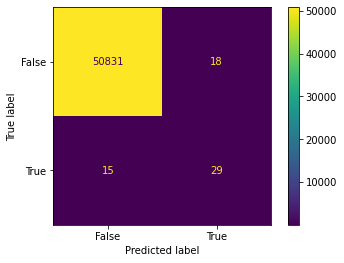

In [20]:
cm_display.plot()
plt.show()

# **Support Vector Machine**

In [21]:
classifier=SVC()

In [22]:
classifier.fit(X_train, y_train)   

SVC()

In [23]:
pred = classifier.predict(X_train)

In [24]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 0.9991354410233234


In [25]:
pred_b = classifier.predict(X_test)

In [26]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50849
           1       0.00      0.00      0.00        44

    accuracy                           1.00     50893
   macro avg       0.50      0.50      0.50     50893
weighted avg       1.00      1.00      1.00     50893



In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [28]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

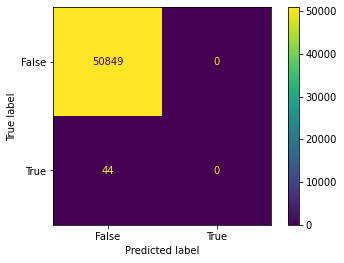

In [29]:
cm_display.plot()
plt.show()

# **Decision Tree Classifier**

In [30]:
classifier=DecisionTreeClassifier()

In [31]:
classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [32]:
pred = classifier.predict(X_train)

In [33]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

Accuracy from sk-learn: 1.0


In [34]:
print('Accuracy from DecisionTreeClassifier for training : 0.89')

Accuracy from DecisionTreeClassifier for training : 0.89


In [35]:
pred_b = classifier.predict(X_test)

In [36]:
report= classification_report(y_test,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50849
           1       0.54      0.61      0.57        44

    accuracy                           1.00     50893
   macro avg       0.77      0.81      0.79     50893
weighted avg       1.00      1.00      1.00     50893



In [37]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

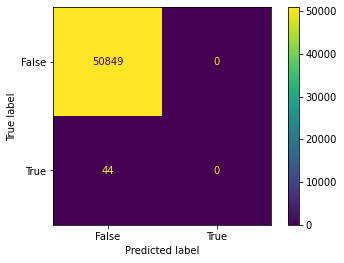

In [38]:
cm_display.plot()
plt.show()

# **KNN**

In [39]:
classifier=KNeighborsClassifier()

In [40]:
classifier.fit(X_train, y_train)   
from sklearn.model_selection import KFold, StratifiedKFold

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))


In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_b)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
classifier=DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train, y_train) 

In [ ]:
pred = classifier.predict(X_train)

In [ ]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_train,y_train)))

In [ ]:
print('Accuracy from DecisionTreeClassifier for training : 0.89')

In [ ]:
pred_b = classifier.predict(X_test)

In [ ]:
report= classification_report(y_test,pred_b)
print(report)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [ ]:
cm_display.plot()
plt.show()